# Interpretation of the mean

When using the term "mean" here will will be referring to the artithmetic mean, which is also known as average.

In [1]:
%matplotlib inline

import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

Lets sample $n=5$ samples $X$ from a normal distribution $\mathcal{N}(\mu, \sigma^2)$ with mean $\mu = 3$ and standard deviation $\sigma = 1$.

In [2]:
n = 5  # Number of samples
# Define original distribution
mu = 3.
sigma = 1.
D = scipy.stats.norm(loc=mu, scale=sigma)
# Get random samples from distribution
X = D.rvs(size=n, random_state=42)

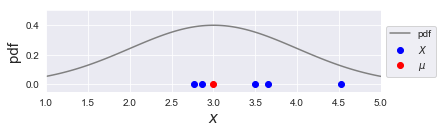

In [3]:
# Plot samples along with the distribution
fig, ax = plt.subplots(figsize=(6,1.5))
# Plot probability density function of distribution
_d = np.linspace(1, 5, 100)
ax.plot(_d, D.pdf(_d), 'grey', label='pdf')
# Plot samples
ax.plot(X, np.zeros_like(X), 'bo', label='$X$')
# Plot mean
ax.plot([mu], [0], 'ro', label='$\mu$')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('pdf', fontsize=15)
ax.set_xlim(1,5)
ax.set_ylim(-0.05,0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Computing the mean

From basic statistics classes we know that the empirical [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) $\bar{X}$ of these samples is defined as:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{x_1 + \ldots + x_n}{n}
$$


In [4]:
print('Mean of X is: {}'.format(
    sum(X)/n
))

Mean of X is: 3.4590029743250867


Next we'll use $\bar{X}$ to refer to the sample mean and $\mu$ to refer to the population mean. The sample mean will be an approximation of the population mean.


## Maximum likelihood estimate of the mean

The mean is often interpreted as the center of a dataset. But how is this center defined?

Lets assume that we don't know the underlying distribution the data $X$ is sampled from. And that the data is sampled independently. Depending on the data a valid assumption could be that the data is coming from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). Obviously this assumption could be false and one should always reason it's validity. However the normal distribution is typically a good choice because of the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). Variables like [signal noise](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise) will typically follow a normal distribution due to the many random processes resulting into the noise.

The normal (or Gaussian) distribution $\mathcal{N}(\mu, \sigma^2)$ has 2 parameters, the mean $\mu$, and and standard deviation $\sigma$. This means we can try to fit the distribution to the data $X$ by finding the most likely parameters that best fit the data. This is what is known as [maximum likelihood estimation (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).


### Likelihood

The [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) $\mathcal {L}(\mu, \sigma \mid X)$ of $\mu$ and $\sigma$ given data $X$ can be set to the [probability density](https://en.wikipedia.org/wiki/Probability_density_function) of $X$ given parameters $\mu, \sigma$.

The probability density for a normal distribution at point $x$ is defined as:
$$ p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\textstyle \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)} $$

Now since the indepencence assumption the joint density of the full dataset $X$ is $p(X \mid \mu, \sigma) =  p(x_1 \mid \mu, \sigma) \cdot \ldots \cdot p(x_n \mid \mu, \sigma)$.



### Maximizing log-likelihood

Now we will try to find the mean $\hat{\mu}$ corresponding to the maximum of the likelihood function $\mathcal {L}(\mu, \sigma \mid X) = p(X \mid \mu, \sigma)$.

$$
\hat{\mu}, \hat{\sigma} = \underset{\mu, \sigma}{\text{argmax}}{\;\mathcal {L}(\mu, \sigma \mid X)}
$$

Because the exponents are a bit difficult to work with we will transform the function with a [logarithmic function](https://en.wikipedia.org/wiki/Logarithm) which is [strictly increasing](https://en.wikipedia.org/wiki/Monotonic_function) and will thus not affect the maxima of the original likelihood function. We call the resulting function the log-likelihood:

$$
\begin{split}
\log(p(X \mid \mu, \sigma)) & = \log(p(x_1 \mid \mu, \sigma) ) + \ldots + \log(p(x_n \mid \mu, \sigma)) \\
& = \log(\frac{1}{\sqrt{2\pi\sigma^2}}) -\frac{(x_1 - \mu)^2}{2\sigma^2} + \ldots + \log(\frac{1}{\sqrt{2\pi\sigma^2}}) -\frac{(x_n - \mu)^2}{2\sigma^2} \\
& = -n \log(\sqrt{2\pi\sigma^2}) - \frac{1}{2\sigma^2} \left[ (x_1 - \mu)^2 + \ldots + (x_n - \mu)^2\right] \\
\end{split}
$$

The [maximum](https://en.wikipedia.org/wiki/Maxima_and_minima) of this function should have a derivate equal to 0. And since the gaussian only has 1 [stationary](https://en.wikipedia.org/wiki/Stationary_point) point which is it's maximum we can find this by solving:

$$
\frac{\delta \log(p(X \mid \mu, \sigma))}{\delta \mu} = \frac{1}{\sigma^2}([x_1 + \ldots + x_n] - n \mu) = 0
$$

Which can be written as:

$$
\hat{\mu} = \frac{x_1 + \ldots + x_n}{n} = \frac{1}{n}\sum_{i=1}^{n} x_i = \bar{X}
$$

Which is exactly our formula to compute the empirical mean.

## Maximum a posteriori estimation

[Maximum a posteriori (MAP)](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) estimation is a [Bayesian](https://en.wikipedia.org/wiki/Bayesian_statistics) method to find the maximum of the [posterior distribution](https://en.wikipedia.org/wiki/Posterior_probability).

The posterial distibution is defined according to [Bayes rule](https://en.wikipedia.org/wiki/Bayes%27_theorem):

$$
P(\mu, \sigma \mid X) = \frac{P(X \mid \mu, \sigma) P(\mu, \sigma)}{P(X)}
$$

With:
- $P(\mu, \sigma \mid X)$ the [posterior distribution](https://en.wikipedia.org/wiki/Posterior_probability) of parameters $\mu$ and $\sigma$ after observing data $X$.
- $P(X \mid \mu, \sigma)$ the [likelihood](https://en.wikipedia.org/wiki/Likelihood_function) of observing data $X$ when the parameters are $\mu$ and $\sigma$.
- $P(\mu, \sigma)$ is the [prior distribution](https://en.wikipedia.org/wiki/Prior_probability) on parameters $\mu$ and $\sigma$.
- $P(X)$ is the [marginal probability](https://en.wikipedia.org/wiki/Marginal_distribution) of observing the data $X$ (also known as the evidence). Note that this is independent of the parameters $\mu$ and $\sigma$.

The MAP is then defined as:

$$
\hat{\mu}, \hat{\sigma} = \underset{\mu, \sigma}{\text{argmax}}{\;P(\mu, \sigma \mid X)} = \underset{\mu, \sigma}{\text{argmax}}{\; P(X \mid \mu, \sigma) \cdot P(\mu, \sigma)}
$$

The optimization will take the prior for $\mu$ and $\sigma$ into account. Note that the MLE is just the MAP without the prior $P(\mu, \sigma)$.

We won't go in depth here on how to work out the maximization. [See here](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation#Example) for an example.

## Minimizing the mean squared error

Note above that the formula of the normal probability density function contains the squared difference of $x_i$ and $\mu$, $(x_i - \mu)^2$. This means that the mean tries to find the center of the data while minimizing the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) from the center:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{X})^2
$$

Since the [variance](https://en.wikipedia.org/wiki/Variance) is defined as:

$$
Var(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2
$$

Then the mean $\bar{X}$ is the point that minimizes the variance between $\bar{X}$ and all points $x_i$.

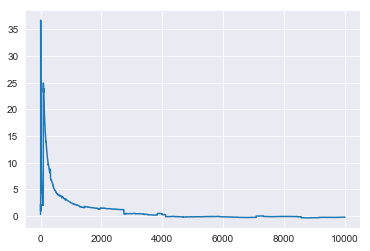

In [16]:
# Mean doesn't always make sense, for example the Cauchy
#  distribution does not have a mean


def gen_cauchy_avgs(n):
    sample_sum = 0
    sample_count = 0
    for i in range(n):
        sample_sum += scipy.stats.cauchy.rvs()
        sample_count += 1
        if (i % 10) == 0:
            yield sample_sum / sample_count

plt.plot(list(gen_cauchy_avgs(100000)))
plt.show()
    

- Median: https://stats.stackexchange.com/a/197029/26888
- Median: https://en.wikipedia.org/wiki/Laplace_distribution#Parameter_estimation
- Mode, Median, Mean: http://www.johnmyleswhite.com/notebook/2013/03/22/modes-medians-and-means-an-unifying-perspective/
- Expected value: https://en.wikipedia.org/wiki/Expected_value
- Expected value: https://stats.stackexchange.com/a/30367/26888
- Expected value: https://math.stackexchange.com/a/1355657/298410
- Expected value: https://am207.github.io/2017/wiki/Expectations.html
- Central limit theorem: https://en.wikipedia.org/wiki/Central_limit_theorem
- Cauchy undefined mean: https://en.wikipedia.org/wiki/Cauchy_distribution#Explanation_of_undefined_moments